In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as ss

%matplotlib inline
path = os.path.normpath('/Users/liuyiran/Documents/hw/HW1.xlsx')
ret = pd.read_excel(io=path, header=1)
ret['Asset 1'].index[0]

Timestamp('2001-01-31 00:00:00')

/Users/liuyiran/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=12,center=False,window=36).std()


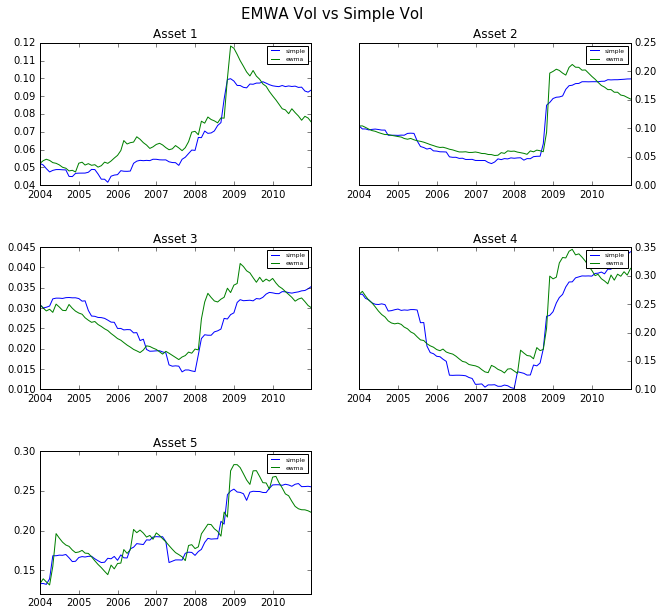

In [37]:
fig = plt.figure(figsize=(10, 9))
log_ret = np.log(ret + 1)
decaylambda=0.94
timelength=36
Vol=pd.DataFrame(index=ret[column].index[timelength-1:])
for column in log_ret.columns:
    simplevol=pd.Series(index=ret[column].index[timelength-1:],name=(column+' simple vol'))
    simplevol=pd.rolling_std(log_ret[column],window=timelength,min_periods=12)[timelength-1:]*np.sqrt(12)
    Vol[column+' simple vol']=simplevol
for column in log_ret.columns:
    ewma=pd.Series(index=ret[column].index[timelength-1:],name=(column+' ewma vol'))
    ewma[0:1]=Vol[column+' simple vol'][0:1]*Vol[column+' simple vol'][0:1]
    for i in range(1,121-timelength):
        ewma[i:(i+1)]=((1-decaylambda)*12*log_ret[column][i+timelength-2:i+timelength-1]*log_ret[column][i+timelength-2:i+timelength-1]+decaylambda*ewma[(i-1):i])
    ewma=ewma.apply(np.sqrt)
    Vol[column+' ewma vol']=ewma
fig = plt.figure(figsize=(10, 9))
fig.suptitle("EMWA Vol vs Simple Vol", fontsize=15)
i=0
for k in range(5):
    temp = fig.add_subplot(3, 2, k+1)
    line1, =plt.plot(Vol.index, Vol['Asset '+str(k+1)+' simple vol'],label='simple')
    line2, =plt.plot(Vol.index, Vol['Asset '+str(k+1)+' ewma vol'],label='ewma')
    temp.set_title('Asset '+str(k+1))
    temp.legend(handles=[line1,line2],prop={'size':6})
    if k%2 == 1:
        temp.yaxis.tick_right()
fig.tight_layout(pad=3.5)
Vol.to_csv('/Users/liuyiran/Documents/hw/HW1!.csv')